# District wise parking duration information around champaign

In [3]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import contextily as ctx
import ipywidgets

In [4]:
#Read in councils
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [5]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


<AxesSubplot:>

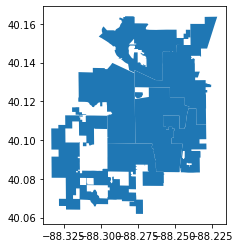

In [6]:
gdf_councils.plot()

In [7]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
gdf_councils = gdf_councils.to_crs(epsg=3857)

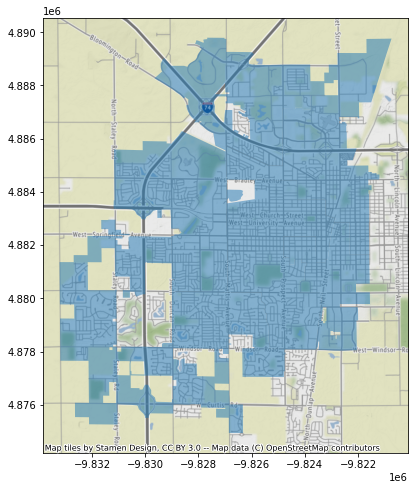

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5)

ctx.add_basemap(ax=ax)
#Layer 1
plt.show()

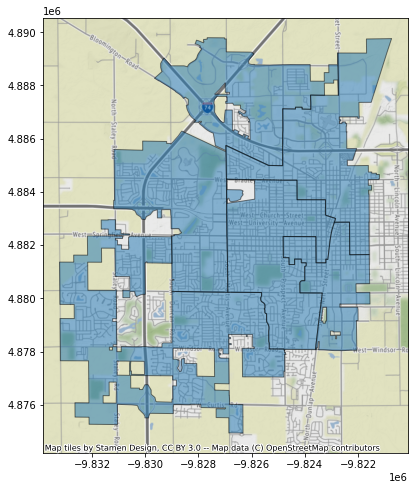

In [10]:
#Adding boundaries district wise
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In [11]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
# re-read for better labeling of coordinates

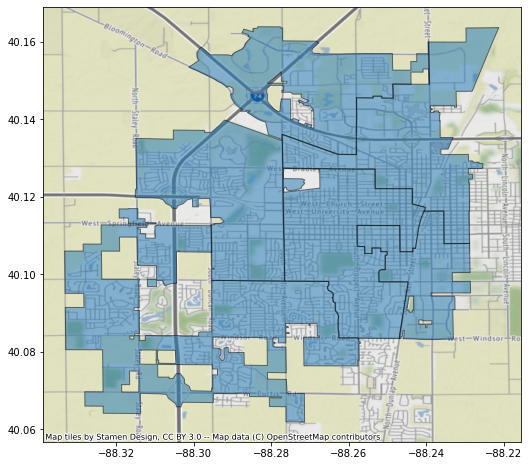

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
# here, you might get an error and can try:
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Adding layer 2 - Maximum parking time around champaign

In [13]:
gdf_prks = geopandas.read_file('https://opendata.arcgis.com/datasets/63cddb4fcb4842be9b10b9396482bd1d_30.geojson')

In [14]:
gdf_prks.head()

,OBJECTID,MeterLoc,HOURS,RATE,DAYS,WRM,ZONEID,ZONEDESC,Notes,FACILITYID,...,BlockStreet,Enforcement_Zone,Enforcement_Time,Enforcement_Days,MAX_TIME,NO_MAX,NO_CHARGE_1,NO_PARKING,NO_CHARGE_2,geometry
0,1,624,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,1,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11242)
1,2,617,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,2,...,200 S Third St,2.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23538 40.11519)
2,3,626,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,3,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11229)
3,4,628,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,4,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11218)
4,5,630,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,5,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23546 40.11207)


time period details for parking

In [15]:
gdf_prks['MAX_TIME'].unique()

array(['2 hr max in 3 hr period', '10 hr max', '30 min max', '4 hr max',
       None, '2 hr max in 3 hr period 8AM - 5PM', '30 minute max',
       '2 hour max in any 3 hour time period', '10 hour max', '3 hr max',
       '4 hour max '], dtype=object)

In [16]:
gdf_prks.loc[gdf_prks['MAX_TIME'].isnull(), 'MAX_TIME'] = 'Not specified'

In [17]:
gdf_prks['MAX_TIME'].unique()

array(['2 hr max in 3 hr period', '10 hr max', '30 min max', '4 hr max',
       'Not specified', '2 hr max in 3 hr period 8AM - 5PM',
       '30 minute max', '2 hour max in any 3 hour time period',
       '10 hour max', '3 hr max', '4 hour max '], dtype=object)

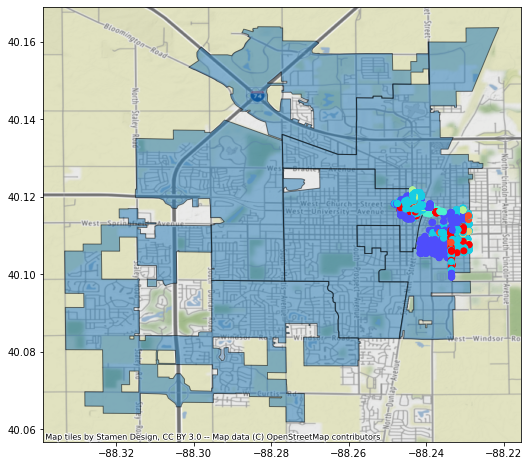

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_prks.plot(column='MAX_TIME', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Adding Legend and Zooming in to the Campus Town

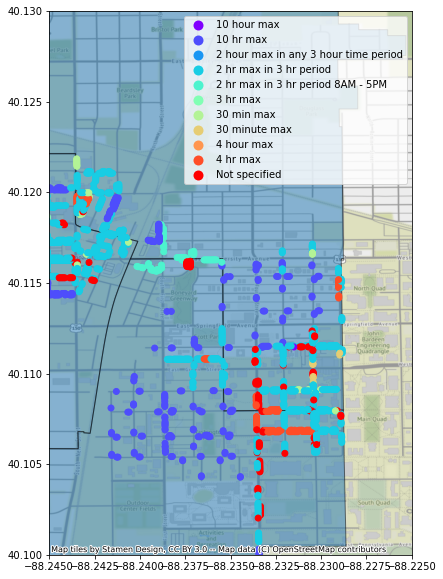

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.130)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_prks.plot(column='MAX_TIME', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [20]:
tperiod = '10 hr max'

gdf_prks.loc[gdf_prks['MAX_TIME']==tperiod].head() # our subsetted dataframe

,OBJECTID,MeterLoc,HOURS,RATE,DAYS,WRM,ZONEID,ZONEDESC,Notes,FACILITYID,...,BlockStreet,Enforcement_Zone,Enforcement_Time,Enforcement_Days,MAX_TIME,NO_MAX,NO_CHARGE_1,NO_PARKING,NO_CHARGE_2,geometry
1,2,617,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,2,...,200 S Third St,2.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23538 40.11519)
8,9,0334,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,,9,...,300 E Armory Ave,NaN,None,None,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23497 40.10544)
9,10,0338,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,10,...,100 E Armory Ave,4.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23828 40.10542)
10,11,0223,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,11,...,800 S First St,4.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23863 40.10825)
11,12,0226,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,12,...,800 S First St,4.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23863 40.10862)


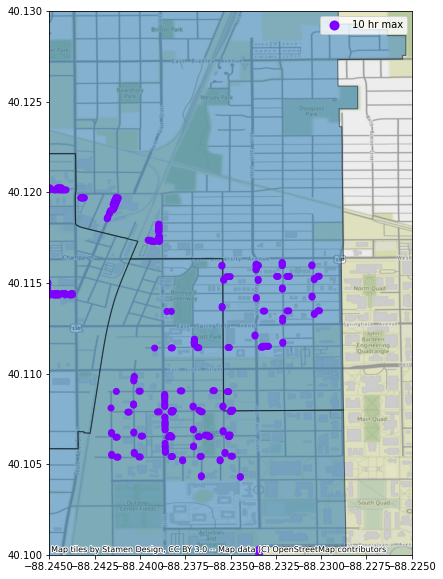

In [21]:
tperiod = '10 hr max'
gdf_prks_subset = gdf_prks.loc[gdf_prks['MAX_TIME']==tperiod] # our subsetted dataframe

fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.130)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_prks_subset.plot(column='MAX_TIME', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
plt.show()

In [22]:
def my_geopandas_plot(tperiod):
    gdf_prks_subset = gdf_prks.loc[gdf_prks['MAX_TIME']==tperiod] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.130)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_prks_subset.plot(column='MAX_TIME', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

In [23]:
#To check if the function is working or not
#my_geopandas_plot('10 hr max')

 Final 2 Layers + Interactivity

In [24]:
@ipywidgets.interact(tperiod=gdf_prks['MAX_TIME'].unique())
def my_geopandas_plot(tperiod):
    gdf_prks_subset = gdf_prks.loc[gdf_prks['MAX_TIME']==tperiod] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_prks_subset.plot(column='MAX_TIME', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

interactive(children=(Dropdown(description='tperiod', options=('2 hr max in 3 hr period', '10 hr max', '30 min…